In [1]:
from visualization import *
import matplotlib.pyplot as plt
import numpy as np
import random

np.random.seed(seed=1)#
random.seed(1)
# print(random.random())

In [2]:
# load data
res = {}
for sigma in [0.05, 0.1, 5.0]:
    for sigma_e in [0.1, 1.0, 2.0]:
        name = 'sigma_'+str(sigma)+'_sigma_e_'+str(sigma_e)
        with open(f'Pickle_files_real/{name}.pickle', 'rb') as f:
            results, algs, attr, args = pickle.load(f)
        res[name] = {
            'results': results,
            'algs': algs,
            'attr': attr,
            'args': args
        }


In [3]:
algs

['Adv_UCB', 'MEB', 'MEB_naive', 'TS', 'UCB']

In [24]:
# calculate the regret
# generate average regret table
table = []
table.append(['$\sigma$', '$\sigma_e$', 'MEB', 'MEB_naive', 'TS', 'UCB'])
for sigma_e in [0.1, 1.0, 2.0]:
    for sigma in [0.05, 0.1, 5.0]:
        name = 'sigma_'+str(sigma)+'_sigma_e_'+str(sigma_e)
        one_row = []
        results = res[name]['results']
        args = res[name]['args']
        means = []
        stds = []
        for alg in ['TS', 'UCB', 'MEB', 'MEB_naive']:
            if alg == 'Adv_UCB':
                continue
            tmp_mean = results[alg]['regret_err_sum'][-1] / args.n / args.T 
            tmp_std = results[alg]['regret_err_sum2'][-1] / args.n / args.T**2
            # tmp_mean = tmp_mean / args.n / args.T 
            tmp_std = ((tmp_std - tmp_mean ** 2) ** 0.5) / args.n**0.5
            tmp_mean = tmp_mean * 10
            tmp_std = tmp_std * 10
            means.append(tmp_mean)
            stds.append(tmp_std)
            one_row.append(f'{tmp_mean:.3f} ({tmp_std:.4f})')
            # one_row.append(f'{tmp_mean:.3f}')
        
        # Find max mean value index
        max_idx = means.index(min(means))
        # Bold the max value
        one_row[max_idx] = f'\\textbf{{{one_row[max_idx]}}}'
        
        _, sigma, _, _, sigma_e = name.split('_')
        table.append([sigma, sigma_e] + one_row)
# print table
for row in table:
    print(' & '.join(map(str, row)) + ' \\\\')


$\sigma$ & $\sigma_e$ & MEB & MEB_naive & TS & UCB \\
0.05 & 0.1 & 0.021 (0.0003) & 0.053 (0.0015) & \textbf{0.019 (0.0003)} & 0.019 (0.0003) \\
0.1 & 0.1 & 0.023 (0.0003) & 0.054 (0.0015) & \textbf{0.020 (0.0003)} & 0.020 (0.0003) \\
5.0 & 0.1 & 0.536 (0.0077) & 0.704 (0.0095) & 0.676 (0.0109) & \textbf{0.530 (0.0078)} \\
0.05 & 1.0 & 0.037 (0.0009) & 0.052 (0.0014) & \textbf{0.024 (0.0004)} & 0.031 (0.0008) \\
0.1 & 1.0 & 0.039 (0.0009) & 0.053 (0.0014) & \textbf{0.025 (0.0004)} & 0.032 (0.0008) \\
5.0 & 1.0 & 0.544 (0.0080) & 0.712 (0.0096) & 0.683 (0.0111) & \textbf{0.539 (0.0080)} \\
0.05 & 2.0 & 0.112 (0.0044) & 0.122 (0.0046) & \textbf{0.065 (0.0019)} & 0.075 (0.0025) \\
0.1 & 2.0 & 0.113 (0.0044) & 0.123 (0.0046) & \textbf{0.066 (0.0019)} & 0.075 (0.0025) \\
5.0 & 2.0 & 0.572 (0.0080) & 0.728 (0.0096) & 0.700 (0.0113) & \textbf{0.551 (0.0079)} \\


In [6]:
results.keys()

dict_keys(['Adv_UCB', 'MEB', 'MEB_naive', 'TS', 'UCB'])

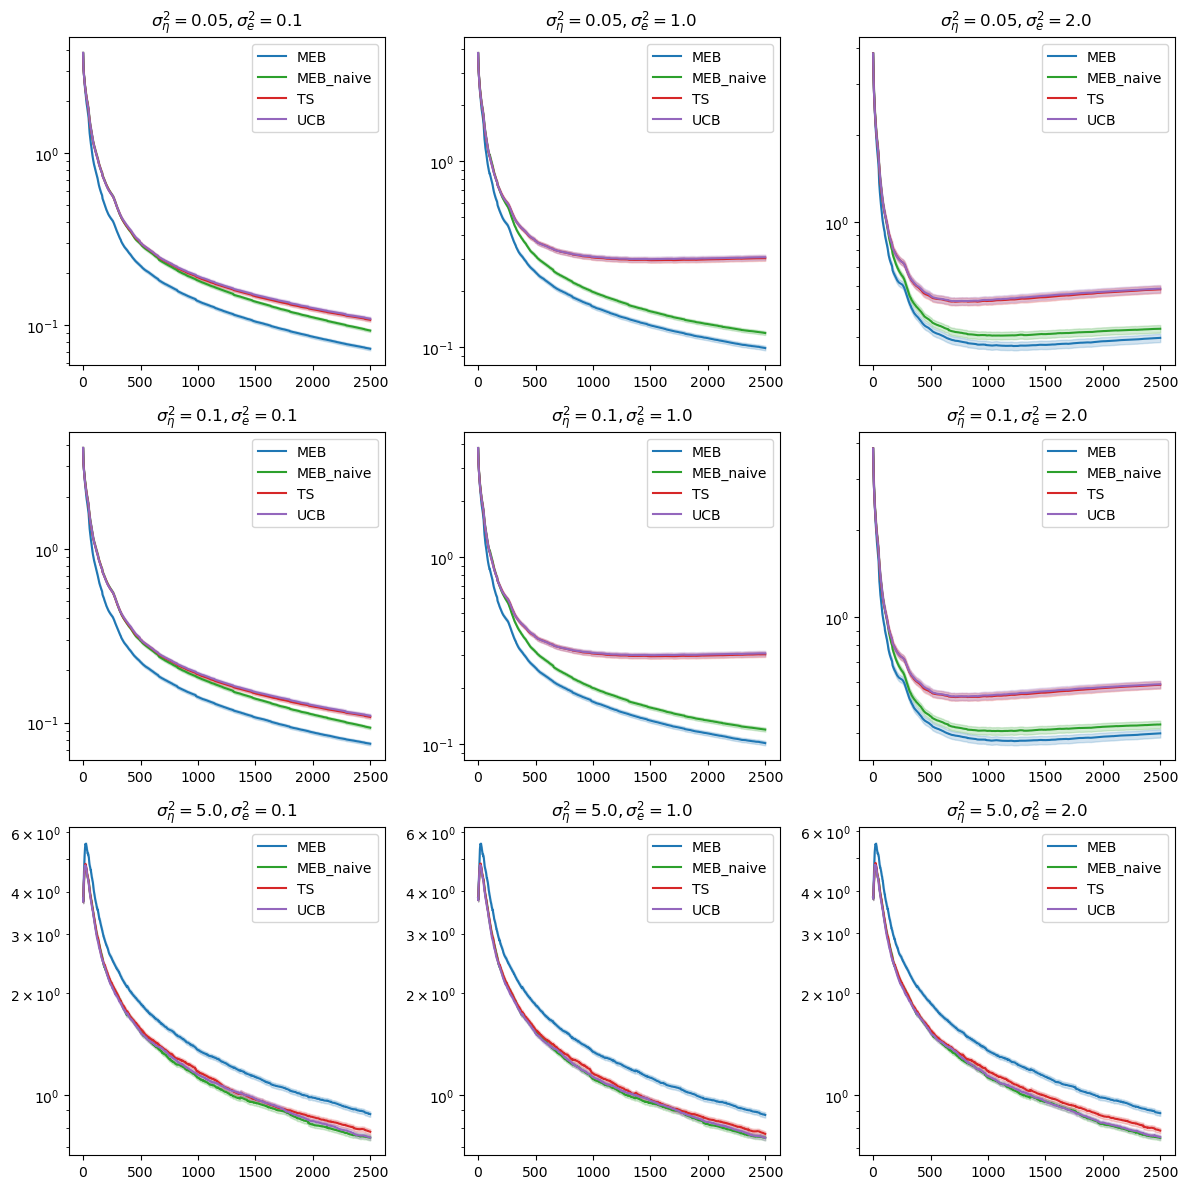

In [9]:
# visualization
colors = {
    'Adv_UCB': '#ff7f0e', # Orange
    'MEB': '#1f77b4',      # Strong blue
    'MEB_naive': '#2ca02c', # Forest green  
    'TS': '#d62728',       # Crimson red
    'UCB': '#9467bd'       # Purple
}
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i, sigma in enumerate([0.05, 0.1, 5.0]):
    for j, sigma_e in enumerate([0.1, 1.0, 2.0]):
        sigma_eta = sigma
        name = 'sigma_'+str(sigma)+'_sigma_e_'+str(sigma_e)
        results = res[name]['results']
        args = res[name]['args']
        for alg in results.keys():
            if alg == 'Adv_UCB':
                continue
            # print(i, j, alg)
            mean = results[alg]['estimation_err_sum_1'][:, 1] / args.n
            std = ((results[alg]['estimation_err_sum2_1'][:, 1] / args.n - mean ** 2) ** 0.5) / args.n ** 0.5
            # print(mean)
            ax[i, j].plot(mean, label = alg, color = colors[alg])
            ax[i, j].fill_between(range(args.T), mean - std, mean + std, alpha=0.2, color = colors[alg])
        ax[i, j].set_yscale('log')
        ax[i, j].set_title(f'$\\sigma_\\eta^2={sigma_eta}, \\sigma_e^2={sigma_e}$')
        # if i == 0 and j == 0:
        ax[i, j].legend()
        # ax[i, j].grid(True)
plt.tight_layout()
plt.show()


In [261]:
import subprocess
# python RunExp_Real.py -T 2500 -n 1000 --sigma $sigma --warmup 0.1 --ind_S 100 --sigma_e $sigma_e -p 0.2 --save --seed 1 --save_name sigma_${sigma}_sigma_e_${sigma_e}
subprocess.call(["python", "RunExp_Real.py", '-T', '2500', '-n', '20', '--sigma', '5.0', '--warmup', '0.1', '--ind_S', '100', '--sigma_e', '2.0', '-p', '0.2', '--save', '--seed', '1'])
with open('Pickle_files_real/res.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
oPlot = FlowLayout()
print(args)
save = False
plot_error(results, algs, oPlot, 1, save = save, savename = 'gaussian_p2_se05_s_001', warmup = 0.0)
plot_regret(results, algs, oPlot, log = True, upper = 9, save = save, savename = 'gaussian_p2_se05_s_001', warmup = 0.0)
oPlot.PassHtmlToCell()


Number of experiments:  20
0 1 2 

KeyboardInterrupt: 

In [190]:
with open('Pickle_files_real/res.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
for alg in results.keys():
    print(alg, np.mean(results[alg]['estimation_err_sum_1'][-1000:]**2)/20)


MEB 3.1099860883544874
MEB_naive 2.7328189171462145
TS 6.228538932404958
UCB 6.230831324893799


In [191]:
with open('Pickle_files_real/res.pickle', 'rb') as f:
    results, algs, attr, args = pickle.load(f)
for alg in results.keys():
    print(alg, np.mean(results[alg]['estimation_err_sum'][-900:]**2)/20)


MEB 0.0002520702830939433
MEB_naive 0.0002793048506567863
TS 0.0011358148718020292
UCB 0.0012727210224085079
